In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

complex_multiplications_dft_p = 0  # Initialize the count for DFT-P
complex_multiplications_fft_p = 0  # Initialize the count for FFT-P

#Computation of parametric discrete fourier transform
def dft_p(x, theta):
    N = len(x)
    S = np.zeros(N, dtype=complex)
    
    global complex_multiplications_dft_p  
    
    for k in range(N):
        S_k = 0
        for n in range(N):
            exp_term = np.exp(-2j * np.pi * (k + theta) * n / N)
            S_k += x[n] * exp_term
            complex_multiplications_dft_p += 1  # Count complex multiplications
        S[k] = S_k / N
    
    return S

#Computation of fast-parametric discrete fourier transform
def fft_p(x, theta):
    N = len(x)
    if N <= 1:
        return x

    even = fft_p(x[0::2], theta)
    odd = fft_p(x[1::2], theta)

    T = [np.exp(-2j * np.pi * theta * k / N) * odd[k] for k in range(N // 2)]

    for k in range(N // 2):
        global complex_multiplications_fft_p  # Declare complex_multiplications_fft_p as a global variable
        complex_multiplications_fft_p += 2  # Count complex multiplications for even and odd

    return [even[k] + T[k] for k in range(N // 2)] + [even[k] - T[k] for k in range(N // 2)]

# Example usage with the same input signal and the same value of theta:
signal = [1, 2, 3, 4,5,6,7,8]
theta = 0.2
result_dft_p = dft_p(signal, theta)
complex_multiplications_fft_p = 0  # Reset the count for FFT-P
result_fft_p = fft_p(signal, theta)


print("Number of complex multiplications in DFT-P:", complex_multiplications_dft_p)

print("Number of complex multiplications in FFT-P:", complex_multiplications_fft_p)


Number of complex multiplications in DFT-P: 64
Number of complex multiplications in FFT-P: 24


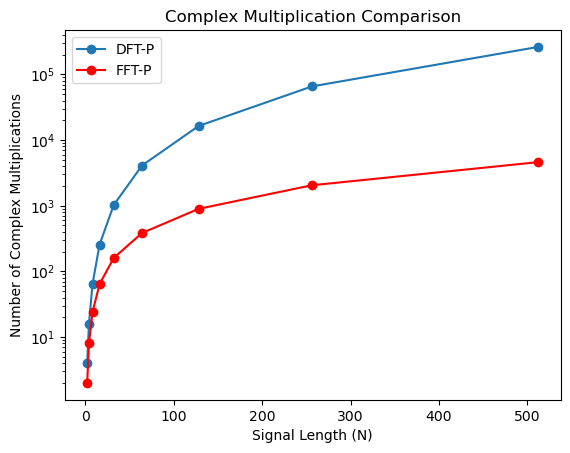

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define your DFT-P and FFT-P functions

N = [2, 4, 8, 16, 32, 64, 128, 256, 512]
mult_dft_p = []
mult_fft_p = []

for i in N:
    signal = np.random.randint(10000000, size=i)
    theta = 0.2
    
    # Measure the number of complex multiplications for DFT-P
    complex_multiplications_dft_p = 0
    dft_p(signal, theta)
    mult_dft_p.append(complex_multiplications_dft_p)
    
    # Measure the number of complex multiplications for FFT-P
    complex_multiplications_fft_p = 0
    fft_p(signal, theta)
    mult_fft_p.append(complex_multiplications_fft_p)


fig, ax1 = plt.subplots()
ax1.set_yscale('log')  # Use a logarithmic scale for the y-axis
ax1.plot(N, mult_dft_p, 'o-', label='DFT-P')
ax1.plot(N, mult_fft_p, 'ro-', label='FFT-P')
plt.legend()
plt.xlabel('Signal Length (N)')
plt.ylabel('Number of Complex Multiplications')
plt.title('Complex Multiplication Comparison')
plt.show()


In [3]:
print(mult_fft_p)

[2, 8, 24, 64, 160, 384, 896, 2048, 4608]


In [4]:
print(mult_dft_p)

[4, 16, 64, 256, 1024, 4096, 16384, 65536, 262144]


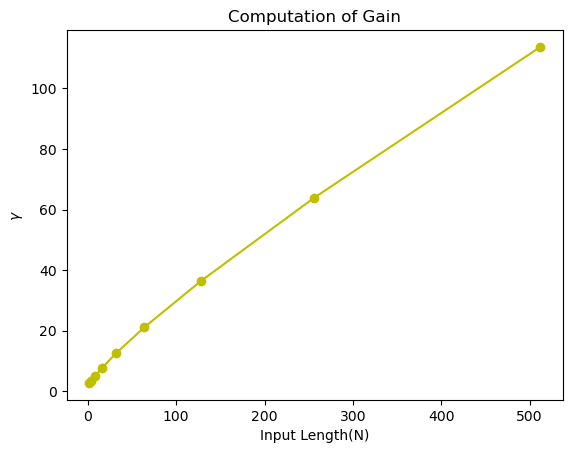

In [5]:
#Computation of gain(gamma)
import math

gamma = []  # Initialize an empty list to store gamma values

for i in N:
    gamma_i = (10 * i - 6) / (5 * math.log(i, 2))
    gamma.append(gamma_i)

plt.plot(N, gamma, '-yo')
plt.ylabel(r'$\gamma$')
plt.xlabel('Input Length(N)')
plt.title('Computation of Gain')
plt.show()



Execution time for DFT-P: 0.0001883000077214092
Execution time for FFT-P: 9.220000356435776e-05
Execution time for classical FFT: 7.239999831654131e-05


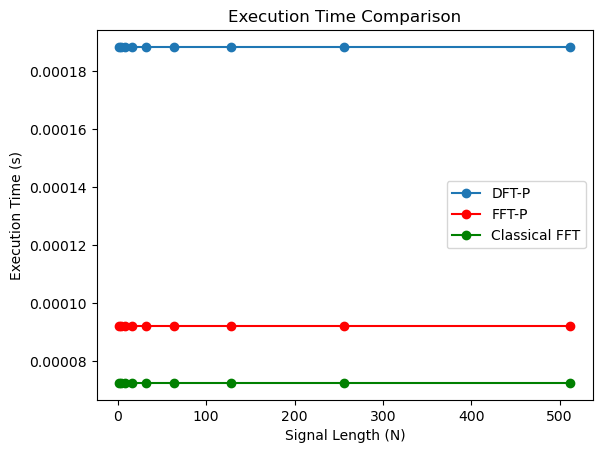

In [6]:
#Execution time Comparision with fft, fft-p, dft
def classical_fft(x):
    return np.fft.fft(x)

# Example usage with the same input signal and the same value of theta:
signal = [1, 2, 3, 4, 5, 6, 7, 8]
theta = 0.2

# Measure the execution time for DFT-P
start_time = time.perf_counter()
result_dft_p = dft_p(signal, theta)
dft_p_execution_time = time.perf_counter() - start_time

# Measure the execution time for FFT-P
start_time = time.perf_counter()
result_fft_p = fft_p(signal, theta)
fft_p_execution_time = time.perf_counter() - start_time

# Measure the execution time for standard FFT
start_time = time.perf_counter()
result_standard_fft = classical_fft(signal)
standard_fft_execution_time = time.perf_counter() - start_time

print("Execution time for DFT-P:", dft_p_execution_time)
print("Execution time for FFT-P:", fft_p_execution_time)
print("Execution time for classical FFT:", standard_fft_execution_time)


# plot for execution time comparison
fig, ax2 = plt.subplots()
ax2.plot(N, [dft_p_execution_time for _ in N], 'o-', label='DFT-P')
ax2.plot(N, [fft_p_execution_time for _ in N], 'ro-', label='FFT-P')
ax2.plot(N, [standard_fft_execution_time for _ in N], 'go-', label='Classical FFT')
plt.legend()
plt.xlabel('Signal Length (N)')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time Comparison')
plt.show()
